# aai-510-group2-final-project

# Cluster Quest - Mapping Social Cohorts in Facebook Networks

## Team Members:

Alejandro Marchini

Carlos Alberto Ortiz Montes De Oca

Swathi Subramanyam Pabbathi

pip install -r requirements.txt

In [21]:
# import all necessary libraries
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from math import log
import networkx as nx
from igraph import Graph, plot
import igraph as ig
from math import log
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

import scipy.sparse

Networkx EDA

In [ ]:
# Load edges from text file
edge_file = 'facebook_combined.txt'

#https://medium.com/@tushar_aggarwal/networkx-a-comprehensive-guide-to-mastering-network-analysis-with-python-fd7e5195f6a0
# Each line contains two node IDs separated by space
G = nx.read_edgelist(edge_file, nodetype=int)

print(f"Graph loaded with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

Graph loaded with 4039 nodes and 88234 edges.


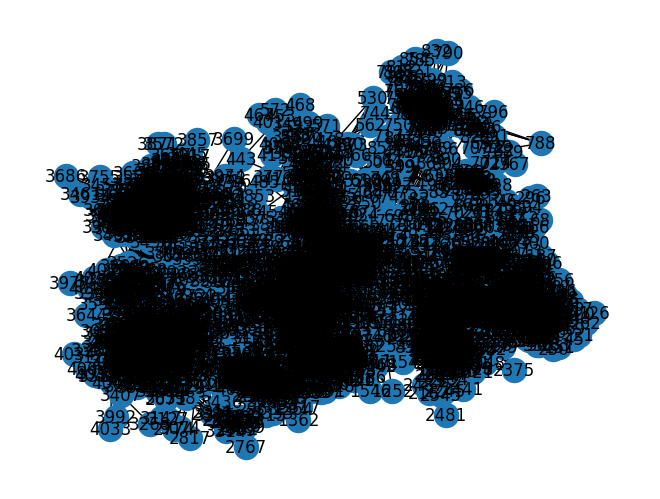

In [3]:
# Leviathan plot
nx.draw(G, with_labels=True)
plt.show()

Detected 13 communities


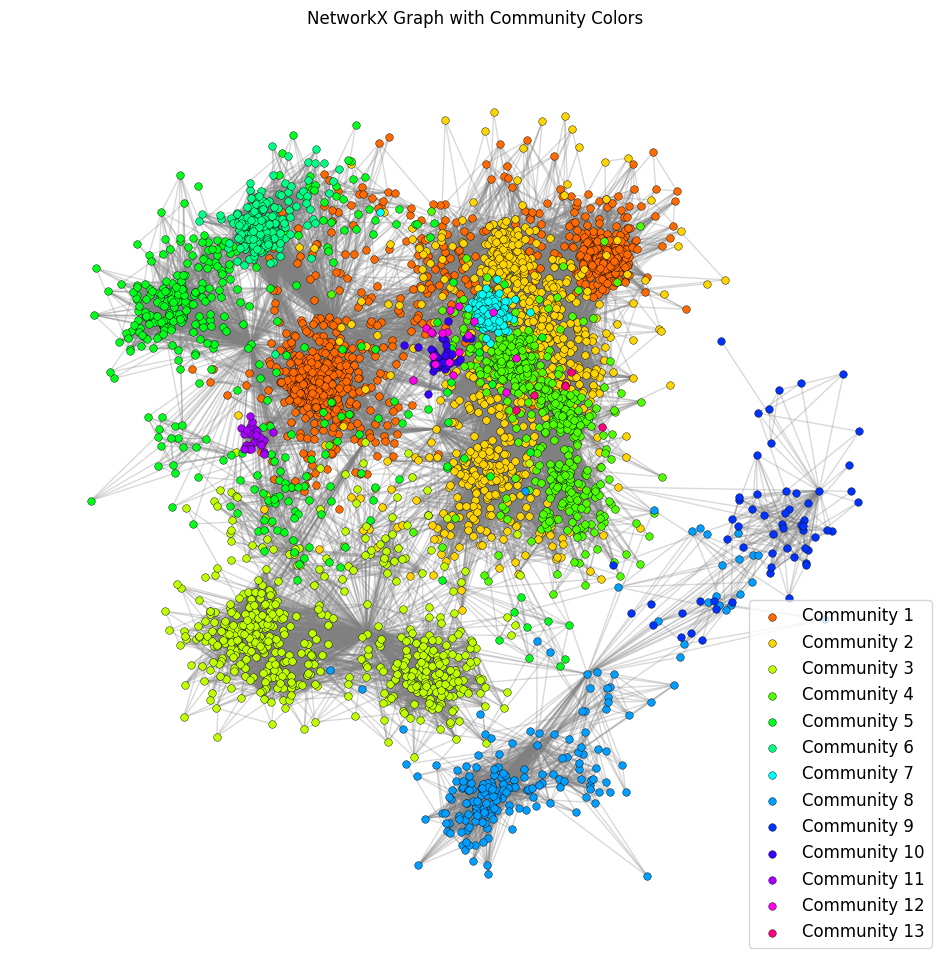

In [4]:
# Example community detection: use greedy modularity communities from NetworkX
from networkx.algorithms.community import greedy_modularity_communities

communities = list(greedy_modularity_communities(G))
print(f"Detected {len(communities)} communities")

# Compute layout once
pos = nx.spring_layout(G, seed=42)

# Prepare color palette
palette = sns.color_palette("hsv", len(communities))

plt.figure(figsize=(12, 12))

# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.3, edge_color='gray')

# Draw nodes community by community
for i, community in enumerate(communities):
    nx.draw_networkx_nodes(
        G,
        pos,
        nodelist=list(community),
        node_color=[palette[i]],
        node_size=30,
        label=f'Community {i+1}',
        edgecolors='k',
        linewidths=0.3
    )

plt.title("NetworkX Graph with Community Colors")
plt.axis('off')
plt.legend(scatterpoints=1, fontsize=12)
plt.show()


In [11]:
#https://ocw.mit.edu/courses/14-15-networks-spring-2022/mit14_15s22_lec2.pdf
# Basic graph statistics

from collections import Counter

# Assume G is your undirected NetworkX graph

n = G.number_of_nodes()
m = G.number_of_edges()

# Average degree
avg_degree = 2 * m / n
print(f"Average degree: {avg_degree:.4f}")

# Density
density = nx.density(G)
print(f"Density: {density:.4f}")

# Degree distribution
#degrees = [d for n, d in G.degree()]
#degree_count = Counter(degrees)
#degree_distribution = {deg: count / n for deg, count in degree_count.items()}
#print("Degree distribution (degree: fraction):")
#for deg, frac in sorted(degree_distribution.items()):
#    print(f"{deg}: {frac:.4f}")

# Diameter
try:
    diameter = nx.diameter(G)
    print(f"Diameter: {diameter}")
except nx.NetworkXError:
    print("Graph not connected; diameter undefined.")

# Average path length
try:
    avg_path_length = nx.average_shortest_path_length(G)
    print(f"Average path length: {avg_path_length:.4f}")
except nx.NetworkXError:
    print("Graph not connected; average path length undefined.")

# Average clustering coefficient
avg_clustering = nx.average_clustering(G)
print(f"Average clustering coefficient (LCC): {avg_clustering:.4f}")

# Number of triangles
triangles = sum(nx.triangles(G).values()) // 3
print(f"Number of triangles (LCC): {triangles}")


Average degree: 43.6910
Density: 0.0108
Diameter: 8
Average path length: 3.6925
Average clustering coefficient (LCC): 0.6055
Number of triangles (LCC): 1612010


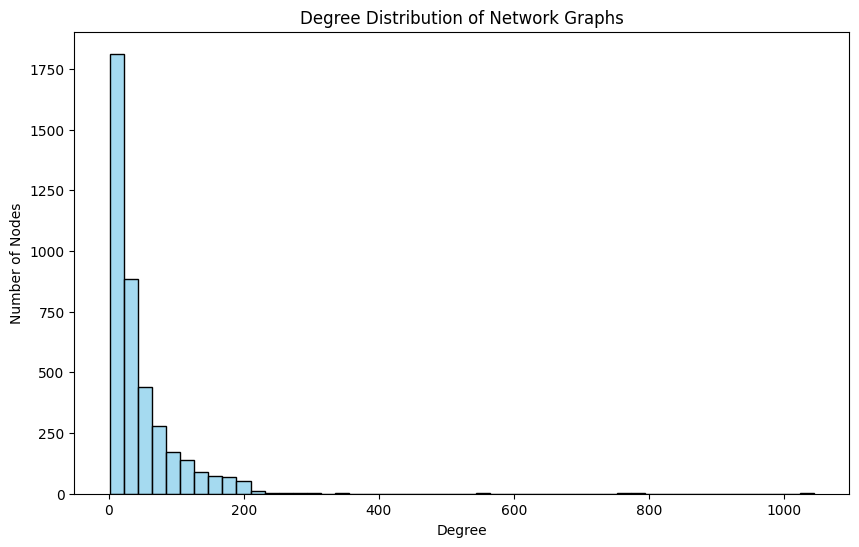

In [12]:
degrees = [d for n, d in G.degree()]
plt.figure(figsize=(10, 6))
sns.histplot(degrees, bins=50, kde=False, color='skyblue')
plt.title('Degree Distribution of Network Graphs')
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
plt.show()

In [35]:
features = pd.DataFrame(index=G.nodes())
#could be changed...
features = features.reset_index().rename(columns={'index': 'node'})
features['degree'] = pd.Series(dict(G.degree()))
features['clustering'] = pd.Series(nx.clustering(G))
features['betweenness'] = pd.Series(nx.betweenness_centrality(G))
features['closeness'] = pd.Series(nx.closeness_centrality(G))
features['eigenvector'] = pd.Series(nx.eigenvector_centrality(G))
features['triangles'] = pd.Series(nx.triangles(G))
features['avg_neigh_degree'] = pd.Series(nx.average_neighbor_degree(G))
features['page_rank'] = pd.Series(nx.pagerank(G))
features['k_core_number'] = pd.Series(nx.core_number(G))

In [36]:
features.head()

,node,degree,clustering,betweenness,closeness,eigenvector,triangles,avg_neigh_degree,page_rank,k_core_number
0,0,347,0.041962,1.463059e-01,0.353343,3.391796e-05,2519,18.959654,0.006290,21
1,1,17,0.419118,2.783274e-06,0.261376,6.045346e-07,57,48.235294,0.000236,13
2,2,10,0.888889,7.595021e-08,0.261258,2.233461e-07,40,49.900000,0.000203,9
3,3,17,0.632353,1.685066e-06,0.261376,6.635648e-07,86,59.764706,0.000226,13
4,4,10,0.866667,1.840332e-07,0.261258,2.236416e-07,39,42.600000,0.000238,9


In [ ]:
#trying and failing to do vector encodings as a feature, might find some other relevant features to implement

In [ ]:
#eda on all features

In [ ]:
#might attempt dimensionality reduction to see if clustering performs better on dataset or lower dimensional space

In [ ]:
#will implement the clustering algorithm